In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 2 — Load the dataset and do a data audit

In [3]:
path = '/Users/amit/Desktop/Electricity Forecasting Model for Delhi/data/powerdemand_5min_2021_to_2024.csv'
df = pd.read_csv(path)

In [4]:
df.shape

(393440, 15)

In [5]:
df.columns

Index(['Unnamed: 0', 'datetime', 'Power demand', 'temp', 'dwpt', 'rhum',
       'wdir', 'wspd', 'pres', 'year', 'month', 'day', 'hour', 'minute',
       'moving_avg_3'],
      dtype='object')

In [6]:
df

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393435,393435,2024-12-12 00:10:00,2146.84,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,10,2174.893333
393436,393436,2024-12-12 00:15:00,2116.66,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,15,2139.416667
393437,393437,2024-12-12 00:20:00,2082.77,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,20,2115.423333
393438,393438,2024-12-12 00:25:00,2059.17,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,25,2086.200000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393440 entries, 0 to 393439
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    393440 non-null  int64  
 1   datetime      393440 non-null  object 
 2   Power demand  393440 non-null  float64
 3   temp          393440 non-null  float64
 4   dwpt          393440 non-null  float64
 5   rhum          393440 non-null  float64
 6   wdir          392900 non-null  float64
 7   wspd          393440 non-null  float64
 8   pres          393440 non-null  float64
 9   year          393440 non-null  int64  
 10  month         393440 non-null  int64  
 11  day           393440 non-null  int64  
 12  hour          393440 non-null  int64  
 13  minute        393440 non-null  int64  
 14  moving_avg_3  393438 non-null  float64
dtypes: float64(8), int64(6), object(1)
memory usage: 45.0+ MB


In [8]:
# Dropping unneccecary columns
df = df.drop(columns = 'moving_avg_3', axis = 1)

In [9]:
df = df.drop(columns = 'Unnamed: 0', axis = 1)

In [10]:
df = df.rename(columns = {
    'Power demand': 'power demand'
})

In [11]:
df.head(20)

,datetime,power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute
0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30
1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35
2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40
3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45
4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50
5,2021-01-01 00:55:00,1925.21,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,55
6,2021-01-01 01:00:00,1907.98,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,0
7,2021-01-01 01:05:00,1878.74,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,5
8,2021-01-01 01:10:00,1859.68,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,10
9,2021-01-01 01:15:00,1836.56,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,15


In [12]:
# Let's check the date and time column 
df['datetime']

0         2021-01-01 00:30:00
1         2021-01-01 00:35:00
2         2021-01-01 00:40:00
3         2021-01-01 00:45:00
4         2021-01-01 00:50:00
                 ...         
393435    2024-12-12 00:10:00
393436    2024-12-12 00:15:00
393437    2024-12-12 00:20:00
393438    2024-12-12 00:25:00
393439    2024-12-12 00:30:00
Name: datetime, Length: 393440, dtype: object

In [13]:
# make datetime type from object to datetime formatte
df['datetime'] = pd.to_datetime(df['datetime'], errors = 'coerce')

In [14]:
df['datetime'].isna().sum()

np.int64(0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393440 entries, 0 to 393439
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   datetime      393440 non-null  datetime64[ns]
 1   power demand  393440 non-null  float64       
 2   temp          393440 non-null  float64       
 3   dwpt          393440 non-null  float64       
 4   rhum          393440 non-null  float64       
 5   wdir          392900 non-null  float64       
 6   wspd          393440 non-null  float64       
 7   pres          393440 non-null  float64       
 8   year          393440 non-null  int64         
 9   month         393440 non-null  int64         
 10  day           393440 non-null  int64         
 11  hour          393440 non-null  int64         
 12  minute        393440 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(5)
memory usage: 39.0 MB


In [16]:
# sort the datetime because time series analysis m important h 
df = df.sort_values('datetime').reset_index(drop = True)

In [17]:
df.head(20)

,datetime,power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute
0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30
1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35
2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40
3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45
4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50
5,2021-01-01 00:55:00,1925.21,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,55
6,2021-01-01 01:00:00,1907.98,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,0
7,2021-01-01 01:05:00,1878.74,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,5
8,2021-01-01 01:10:00,1859.68,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,10
9,2021-01-01 01:15:00,1836.56,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,15


In [18]:
# 5 min frequency check 
delta = df['datetime'].diff()

In [19]:
delta.value_counts().head(10)

datetime
0 days 00:05:00    392289
0 days 00:10:00       272
0 days 00:15:00       267
0 days 00:20:00        93
0 days 01:20:00        52
0 days 01:25:00        46
0 days 00:25:00        42
0 days 01:05:00        37
0 days 01:10:00        33
0 days 00:30:00        25
Name: count, dtype: int64

In [20]:
expected = pd.Timedelta(minutes=5)

In [21]:
print("\nExpected interval:", expected)
print("Most common interval:", delta.mode()[0] if len(delta.mode()) else None)


Expected interval: 0 days 00:05:00
Most common interval: 0 days 00:05:00


In [22]:
pct_expected = (delta == expected).mean() * 100
print(f"\n% intervals exactly 5 minutes: {pct_expected:.2f}%")


% intervals exactly 5 minutes: 99.71%


In [23]:
# Find where time jump is bigger than expected
gap_mask = df['datetime'].diff() > expected

In [24]:
gap_mask

0         False
1         False
2         False
3         False
4         False
          ...  
393435    False
393436    False
393437    False
393438    False
393439    False
Name: datetime, Length: 393440, dtype: bool

In [25]:
gaps = df.loc[gap_mask, ["datetime"]].copy() #creating a table of gaps where gap mask is True means gap exists.

In [26]:
gaps

,datetime
1998,2021-01-08
2285,2021-01-09
2572,2021-01-10
2859,2021-01-11
3146,2021-01-12
...,...
391756,2024-12-06
392330,2024-12-08
392890,2024-12-10
393160,2024-12-11


In [27]:
gaps["prev_datetime"] = df["datetime"].shift(1).loc[gaps.index]
gaps["gap_minutes"] = (gaps["datetime"] - gaps["prev_datetime"]).dt.total_seconds() / 60.  # diffrence btw datetimea dn previous datetime


In [28]:
gaps["gap_minutes"] 

1998      65.0
2285      10.0
2572      10.0
2859      10.0
3146      10.0
          ... 
391756    10.0
392330    15.0
392890    85.0
393160    95.0
393433    80.0
Name: gap_minutes, Length: 1150, dtype: float64

In [29]:
len(gaps)

1150

In [30]:
gaps

,datetime,prev_datetime,gap_minutes
1998,2021-01-08,2021-01-07 22:55:00,65.0
2285,2021-01-09,2021-01-08 23:50:00,10.0
2572,2021-01-10,2021-01-09 23:50:00,10.0
2859,2021-01-11,2021-01-10 23:50:00,10.0
3146,2021-01-12,2021-01-11 23:50:00,10.0
...,...,...,...
391756,2024-12-06,2024-12-05 23:50:00,10.0
392330,2024-12-08,2024-12-07 23:45:00,15.0
392890,2024-12-10,2024-12-09 22:35:00,85.0
393160,2024-12-11,2024-12-10 22:25:00,95.0


In [31]:
if len(gaps):
    print(gaps["gap_minutes"].describe())


count    1150.000000
mean       98.778261
std       265.119328
min        10.000000
25%        15.000000
50%        20.000000
75%        75.000000
max      3485.000000
Name: gap_minutes, dtype: float64


In [32]:
#“We identified several multi-day timestamp gaps (up to ~2.4 days), indicating telemetry/data-pipeline outages; these are treated as major data-quality events and will be excluded from lag-based training windows and flagged by the anomaly module.”

In [33]:
gaps.sort_values("gap_minutes", ascending=False).head(10)[
    ["prev_datetime", "datetime", "gap_minutes"]
]

,prev_datetime,datetime,gap_minutes
55378,2021-07-19 13:55:00,2021-07-22,3485.0
77166,2021-10-09 23:50:00,2021-10-12,2890.0
153410,2022-07-22 12:05:00,2022-07-24,2155.0
106039,2022-01-25 19:50:00,2022-01-27,1690.0
110535,2022-02-12 21:15:00,2022-02-14,1605.0
115731,2022-03-04 22:45:00,2022-03-06,1515.0
299175,2023-12-31 22:45:00,2024-01-02,1515.0
93264,2021-12-08 23:35:00,2021-12-10,1465.0
131317,2022-04-30 23:45:00,2022-05-02,1455.0
323482,2024-03-31 23:45:00,2024-04-02,1455.0


In [34]:
# Check duplicates 
df['datetime'].duplicated().sum()

np.int64(0)

In [35]:
df.isna().sum()

datetime          0
power demand      0
temp              0
dwpt              0
rhum              0
wdir            540
wspd              0
pres              0
year              0
month             0
day               0
hour              0
minute            0
dtype: int64

In [36]:
# We performed sanity checks on the target and weather features by validating value ranges, checking for impossible values (e.g., negative demand), and quantifying missingness, ensuring the dataset is suitable for reliable time-series forecasting.”

In [37]:
# Missing values % per column
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
print("Missing % by column (top 15):")
print(missing_pct.head(15))

# If you want only columns with any missing values:
print("\nColumns with missing values:")
print(missing_pct[missing_pct > 0])

Missing % by column (top 15):
wdir            0.137251
datetime        0.000000
power demand    0.000000
temp            0.000000
dwpt            0.000000
rhum            0.000000
wspd            0.000000
pres            0.000000
year            0.000000
month           0.000000
day             0.000000
hour            0.000000
minute          0.000000
dtype: float64

Columns with missing values:
wdir    0.137251
dtype: float64


In [38]:
# checking id there is any negeative value in power demand

import numpy as np

# Target distribution
print("power demand describe:")
print(df["power demand"].describe())

# Check impossible values
print("\nNegative power demand rows:", (df["power demand"] < 0).sum())

# Weather sanity (basic ranges + missing)
weather_cols = ["temp", "dwpt", "rhum", "wdir", "wspd", "pres"]
for c in weather_cols:
    if c in df.columns:
        s = df[c]
        print(f"\n{c}: missing={s.isna().mean()*100:.4f}% | min={s.min()} | max={s.max()}")


power demand describe:
count    393440.000000
mean       3960.736469
std        1300.473773
min        1302.080000
25%        3074.900000
50%        3832.320000
75%        4870.465000
max        8631.530000
Name: power demand, dtype: float64

Negative power demand rows: 0

temp: missing=0.0000% | min=4.0 | max=46.4

dwpt: missing=0.0000% | min=-8.6 | max=30.3

rhum: missing=0.0000% | min=5.0 | max=100.0

wdir: missing=0.1373% | min=0.0 | max=360.0

wspd: missing=0.0000% | min=0.0 | max=63.0

pres: missing=0.0000% | min=989.6 | max=1027.0


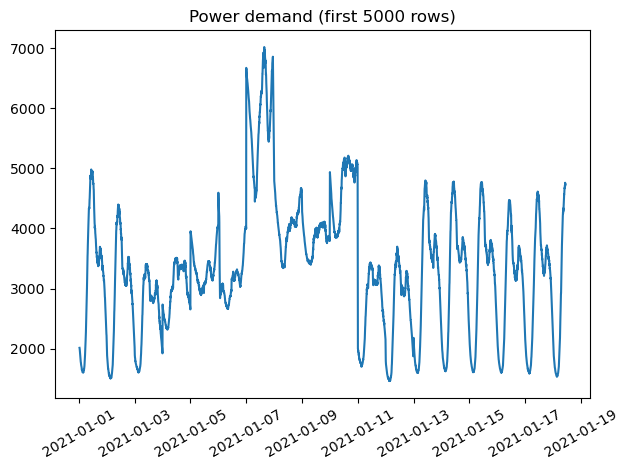

In [39]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df["datetime"].iloc[:5000], df["power demand"].iloc[:5000])
plt.title("Power demand (first 5000 rows)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [46]:
# let's first impute the missing wind direction missing values
df= df.sort_values('datetime').reset_index(drop = True)

In [50]:
df['wdir']= df['wdir'].ffill().bfill()

In [53]:
df['wdir'].isnull().sum()

np.int64(0)

In [54]:
df.head(10)

,datetime,power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute
0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30
1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35
2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40
3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45
4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50
5,2021-01-01 00:55:00,1925.21,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,55
6,2021-01-01 01:00:00,1907.98,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,0
7,2021-01-01 01:05:00,1878.74,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,5
8,2021-01-01 01:10:00,1859.68,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,10
9,2021-01-01 01:15:00,1836.56,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,15


In [55]:
# after imputing wdir , wdir is in circular angles but ML models assume number in straight line(linear)That causes a specific problem: 0° and 360° are the same direction, but numerically they look far apart.
radians = np.deg2rad(df["wdir"])
df["wdir_sin"] = np.sin(radians)
df["wdir_cos"] = np.cos(radians)

In [56]:
df

,datetime,power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,wdir_sin,wdir_cos
0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,0.000000,1.000000
1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,0.000000,1.000000
2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,0.000000,1.000000
3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,0.000000,1.000000
4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393435,2024-12-12 00:10:00,2146.84,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,10,-0.999848,-0.017452
393436,2024-12-12 00:15:00,2116.66,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,15,-0.999848,-0.017452
393437,2024-12-12 00:20:00,2082.77,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,20,-0.999848,-0.017452
393438,2024-12-12 00:25:00,2059.17,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,25,-0.999848,-0.017452


In [59]:
# now df is cleaned export it in csv file

df_clean = df.copy()
df_clean.to_csv("processed_power_demand.csv", index=False)
print("Saved:", df_clean.shape)

Saved: (393440, 15)
